<a href="https://colab.research.google.com/github/James-Sutanto/Econ-Growth/blob/main/Economic_Growth.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive 
drive.mount('/content/drive/')

Mounted at /content/drive/


In [ ]:
import pandas as pd
# Find path to file and create variable for path
path = '/content/drive/MyDrive/BCA Dataset/Assignment Dataset.xlsx'
data = pd.read_excel(path, sheet_name = 'GDP')
print(data)

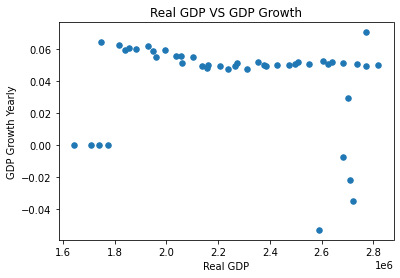

,Year,Real GDP,GDP Growth YoY
Year,1.000000,0.976986,-0.200217
Real GDP,0.976986,1.000000,-0.115176
GDP Growth YoY,-0.200217,-0.115176,1.000000


In [ ]:
scatter_plot(data['Real GDP'], data['GDP Growth YoY'])
data.corr()

In [ ]:
import matplotlib.pyplot as plt
def scatter_plot(col1,col2,xlab,ylab,title):
  # set the x and y values first 
  x = col1
  y = col2

  #Plotting the points on a scatter plot
  plt.scatter(x,y,s=30)

  # label x axis 
  plt.xlabel(xlab)

  # label y axis 
  plt.ylabel(ylab)

  #plot title
  plt.title(title)

  # Showing the plot 
  plt.show()


In [ ]:
def hist_plot(col):
  # Construting a histogram 
  x_hist = col

  # creating bins: 
  range = (-0.05,0.07)
  bins = 6

  # plot histogram
  plt.hist(x_hist, bins,range,rwidth= 0.5,histtype= 'bar')

  # create x and y label 
  plt.xlabel('GDP Growth')
  plt.ylabel('Number of Occurences')

  #Title 
  plt.title('Histogram GDP Growth')

  # show histogram
  plt.show()

In [ ]:
# Summary Stats 
def sum_stats(data):
 print( data.describe())
 print(data.corr())


In [ ]:
import seaborn as sns
# correlation heat map for data 
def heatmap(data):
  corrmat = data.corr().round(2)
  sns.set(rc={'figure.figsize':(12,10)})
  sns.heatmap(data=corrmat,annot=True)
  plt.show()

In [ ]:
df_cpi = pd.read_excel(path, sheet_name='CPI')
df_cpi.head()
df_cpi.drop(df_cpi.iloc[:,0:6],inplace=True,axis=1)

In [ ]:
df_ml = pd.DataFrame()
df_ml['GDP Growth Rate'] = data ['GDP Growth YoY']
df_ml['Core Inflation'] = df_cpi['Core Inflation YOY']
df_ml.head()

,GDP Growth Rate,Core Inflation
0,0.00000,4.428841
1,0.00000,3.880544
2,0.00000,3.559986
3,0.00000,3.695130
4,0.06477,3.814690


(46, 2)


/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


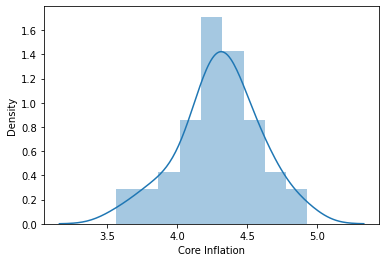

In [ ]:
import numpy as np 
print(df_ml.shape)
sns.distplot(df_ml['Core Inflation'])

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


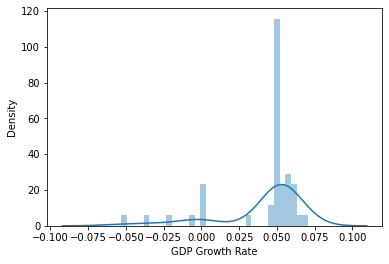

In [ ]:
sns.distplot(df_ml['GDP Growth Rate'])

Text(0.5, 1.0, 'Inflation to GDP Growth')

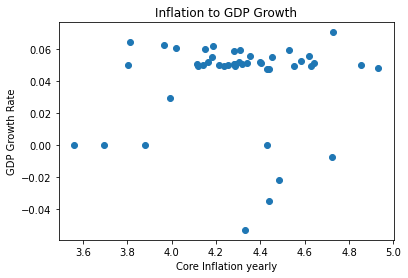

In [ ]:
plt.scatter(df_ml['Core Inflation'],df_ml['GDP Growth Rate'])
plt.xlabel('Core Inflation yearly')
plt.ylabel('GDP Growth Rate')
plt.title('Inflation to GDP Growth')

In [ ]:
df_ml = pd.read_excel(path, sheet_name = 'Multiple Regression')
df_ml.head()

,GDP G Rate,PR,Jkt COMP,Export,Com,CPI,Import,S&P 500
0,0.00000,5.50,2575.413,14606.2,537.943,89.06,12558.7,1132.98
1,0.00000,5.25,2605.277,14415.3,538.477,89.32,11749.9,1136.52
2,0.00000,5.25,2603.297,16366.0,547.876,89.20,14486.2,1137.14
3,0.00000,5.25,2586.895,16554.2,542.586,89.33,14888.2,1141.70
4,0.06477,5.00,2614.370,18287.4,543.221,89.59,14825.9,1144.98


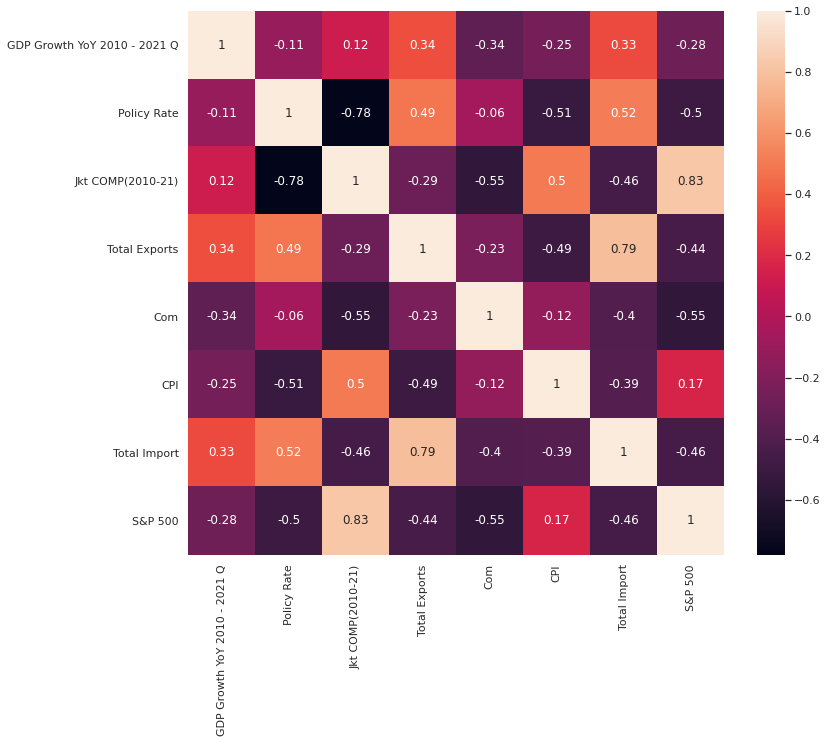

In [ ]:
heatmap(df_ml)

In [ ]:
df_ml.isnull().sum()

GDP G Rate    2897
PR            2878
Jkt COMP        97
Export        2816
Com              0
CPI           2803
Import        2816
S&P 500          3
dtype: int64

In [ ]:
df_ml = df_ml.dropna()

In [ ]:
df_ml.isnull().sum()

GDP G Rate    0
PR            0
Jkt COMP      0
Export        0
Com           0
CPI           0
Import        0
S&P 500       0
dtype: int64

In [ ]:
df_ml = df_ml.drop(['Import','S&P 500'],axis=1)

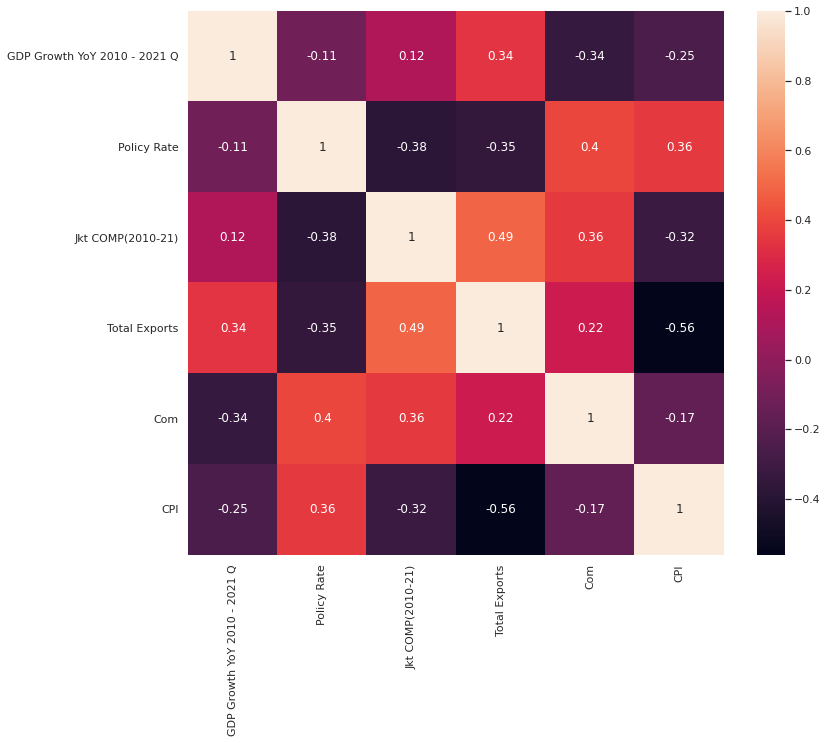

In [ ]:
heatmap(df_ml)

In [ ]:
import numpy as np 
from sklearn import linear_model
from sklearn.model_selection import train_test_split

#Initialize x and y
x_ml = df_ml.drop(['GDP G Rate'],axis=1).values
y_ml = df_ml['GDP G Rate'].values

#split the values 
xml_train,xml_test,yml_train,yml_test = train_test_split(x_ml,y_ml,test_size=0.3,random_state=0)

#train model on training set 
ml = linear_model.LinearRegression()
ml.fit(xml_train,yml_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
# predict values 
y_pred = ml.predict(xml_test)
print(y_pred)

[ 0.02612378  0.06606952  0.05699741  0.0393228   0.0526438   0.02119178
  0.03515743  0.06646719  0.0297384   0.03838702  0.03337575  0.04422109
 -0.00947909  0.01840779]


In [ ]:
from sklearn.metrics import r2_score
print('R2 score',r2_score(yml_test,y_pred)) 

R2 score 0.48948064906741606


In [ ]:
from sklearn import metrics
print('Mean Absolute Error', metrics.mean_absolute_error(yml_test,y_pred) )
print('Mean Squared Error', metrics.mean_squared_error(yml_test,y_pred) )
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(yml_test,y_pred) ))

Mean Absolute Error 0.01676661106078165
Mean Squared Error 0.00034233228467763155
Root Mean Squared Error 0.018502223776552685


In [ ]:
import statsmodels.api as sm 
#X = np.column_stack((df_ml['Policy Rate'],df_ml['Jkt COMP(2010-21)'],df_ml['Total Exports'],df_ml['CPI'],df_ml['Com']))
X= x_ml
y = df_ml['GDP G Rate']
X2= sm.add_constant(X)
est = sm.OLS(y,X)
est2 = est.fit()
print(est2.summary())

                                 OLS Regression Results                                
Dep. Variable:             GDP G Rate   R-squared (uncentered):                   0.839
Model:                            OLS   Adj. R-squared (uncentered):              0.820
Method:                 Least Squares   F-statistic:                              42.87
Date:                Tue, 14 Sep 2021   Prob (F-statistic):                    3.09e-15
Time:                        20:53:26   Log-Likelihood:                          114.92
No. Observations:                  46   AIC:                                     -219.8
Df Residuals:                      41   BIC:                                     -210.7
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

Text(0.5, 1.0, 'Actual VS Predicted MLR')

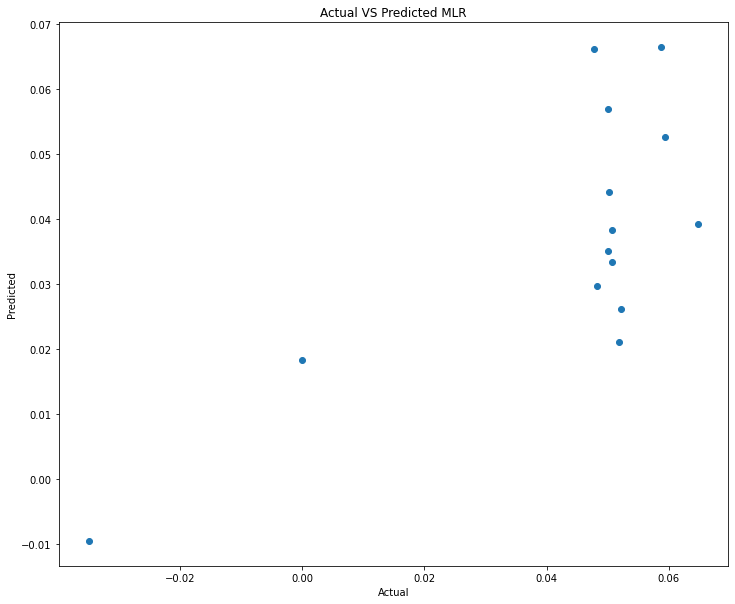

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(yml_test,y_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted MLR')

In [ ]:
ypred_df = pd.DataFrame({'Actual': yml_test, 'Predicted': y_pred, 'Difference': yml_test-y_pred})
print(ypred_df)

      Actual  Predicted  Difference
0   0.052147   0.026124    0.026023
1   0.047795   0.066070   -0.018275
2   0.050084   0.056997   -0.006914
3   0.064770   0.039323    0.025447
4   0.059400   0.052644    0.006757
5   0.051897   0.021192    0.030706
6   0.050126   0.035157    0.014968
7   0.058706   0.066467   -0.007761
8   0.048312   0.029738    0.018574
9   0.050642   0.038387    0.012255
10  0.050648   0.033376    0.017272
11  0.050191   0.044221    0.005970
12 -0.034884  -0.009479   -0.025405
13  0.000000   0.018408   -0.018408


In [ ]:
# polynomial regression
x = df_ml.iloc[:,3:].values
y = df_ml['GDP G Rate'].values

# scale the data 
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
x = scale.fit_transform(x)

from sklearn.model_selection import train_test_split
xpl_train, xpl_test, ypl_train, ypl_test = train_test_split(x,y,test_size = 0.3, random_state = 0)

from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree = 2,include_bias=False)
x_poly = poly.fit_transform(xpl_train)
poly.fit(xpl_train,ypl_train)

from sklearn.linear_model import LinearRegression
model = linear_model.LinearRegression()
model.fit(x_poly,ypl_train)

y_pred_poly = model.predict(poly.fit_transform(xpl_test))

In [ ]:
from sklearn.metrics import r2_score
from sklearn import metrics
print('R2 score',r2_score(ypl_test,y_pred_poly)) 
print('Mean Absolute Error', metrics.mean_absolute_error(ypl_test,y_pred_poly) )
print('Mean Squared Error', metrics.mean_squared_error(ypl_test,y_pred_poly) )
print('Root Mean Squared Error', np.sqrt(metrics.mean_squared_error(ypl_test,y_pred_poly) ))

R2 score 0.6625132876169763
Mean Absolute Error 0.010187961147369492
Mean Squared Error 0.0002263040511341553
Root Mean Squared Error 0.015043405569689175


Text(0.5, 1.0, 'Actual VS Predicted PLR')

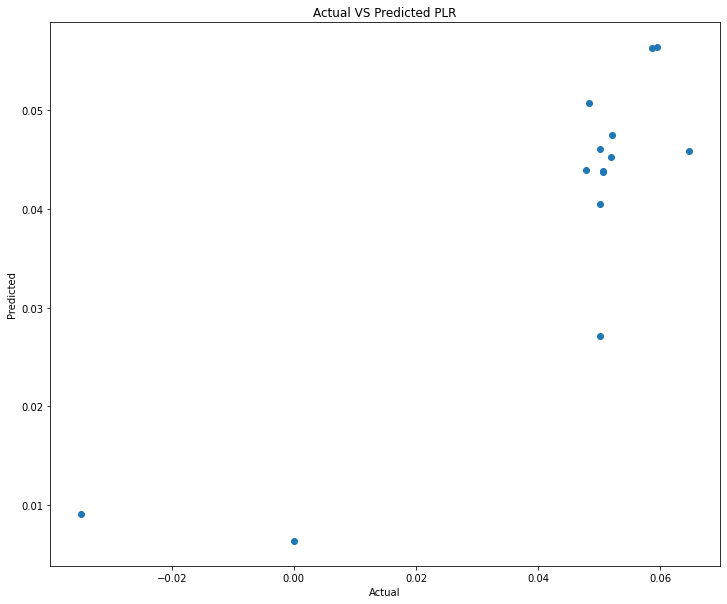

In [ ]:
plt.figure(figsize=(12,10))
plt.scatter(ypl_test,y_pred_poly)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Actual VS Predicted PLR')

In [ ]:
#stats models implementation of polynomial regression
# scaler 
X_Scaled_Poly = sm.add_constant(poly.fit_transform(x))
Y = df_ml['GDP Growth YoY 2010 - 2021 Q']
results = sm.OLS(Y, X_Scaled_Poly).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                 
========================================================================================
Dep. Variable:     GDP Growth YoY 2010 - 2021 Q   R-squared:                       0.552
Model:                                      OLS   Adj. R-squared:                  0.440
Method:                           Least Squares   F-statistic:                     4.931
Date:                          Mon, 13 Sep 2021   Prob (F-statistic):           0.000245
Time:                                  20:50:38   Log-Likelihood:                 118.44
No. Observations:                            46   AIC:                            -216.9
Df Residuals:                                36   BIC:                            -198.6
Df Model:                                     9                                         
Covariance Type:                      nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0531      0.006      8.562      0.000       0.041       0.066
x1             0.0050      0.005      1.008      0.320      -0.005       0.015
x2             0.0003      0.010      0.030      0.976      -0.020       0.021
x3            -0.0039      0.008     -0.514      0.610      -0.019       0.012
x4             0.0032      0.004      0.863      0.394      -0.004       0.011
x5             0.0096      0.005      1.779      0.084      -0.001       0.021
x6             0.0039      0.006      0.639      0.527      -0.009       0.016
x7            -0.0020      0.006     -0.354      0.725      -0.013       0.009
x8             0.0087      0.009      0.916      0.366      -0.011       0.028
x9            -0.0114      0.006     -1.852      0.072      -0.024       0.001
==============================================================================
Omnibus:                       28.690   Durbin-Watson:                   1.270
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              197.833
Skew:                          -1.038   Prob(JB):                     1.10e-43
Kurtosis:                      12.945   Cond. No.                         12.7
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fba5d4092d0>,
      dtype=object)

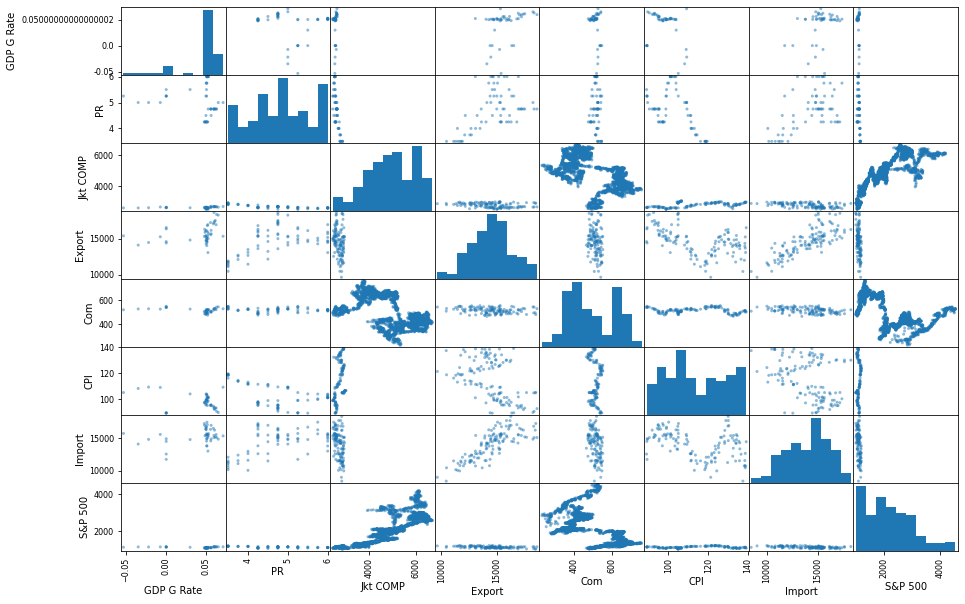

In [ ]:
path = '/content/drive/MyDrive/BCA Dataset/Assignment Dataset.xlsx'
df = pd.read_excel(path, sheet_name = 'Multiple Regression')
features = df.columns
pd.plotting.scatter_matrix(df[features], figsize=(15,10)) 

Text(0.5, 1.0, 'Com Dist')

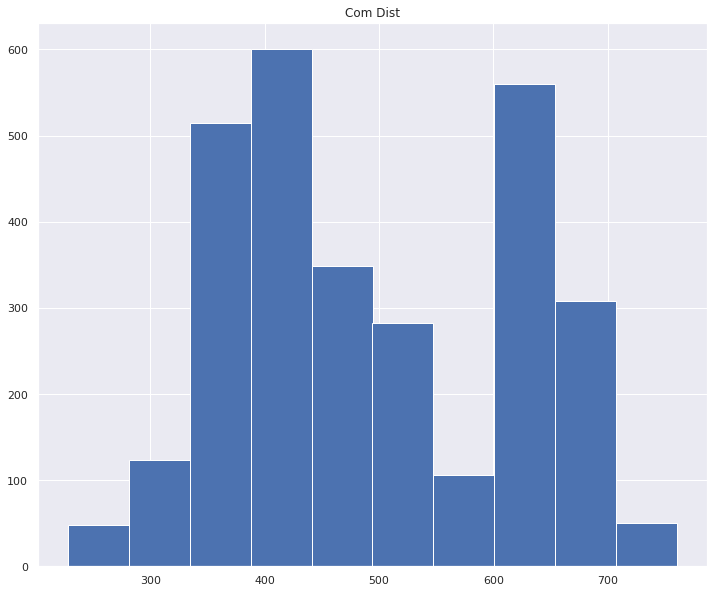

In [ ]:
plt.hist(df['Com'])
plt.title('Com Dist')

Text(0.5, 1.0, 'log_Com')

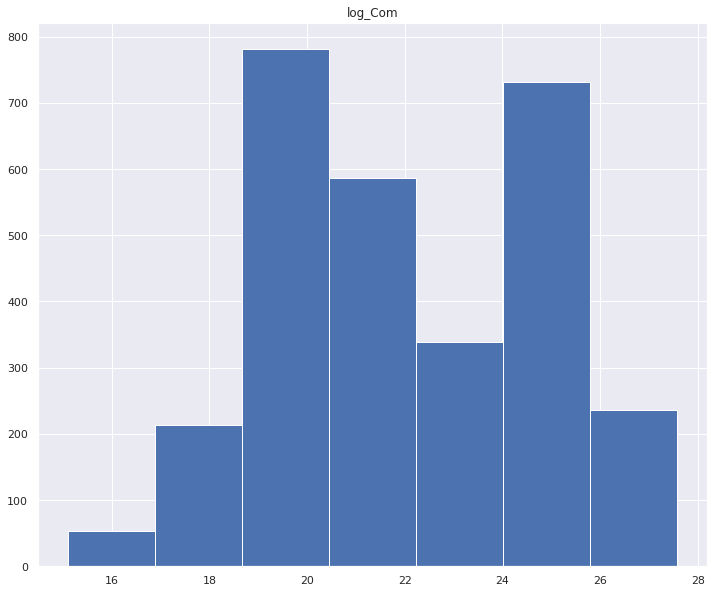

In [ ]:
plt.hist(np.log(df['Com']),bins = 7)
plt.title('log_Com')

Text(0.5, 1.0, 'LOG_CPI')

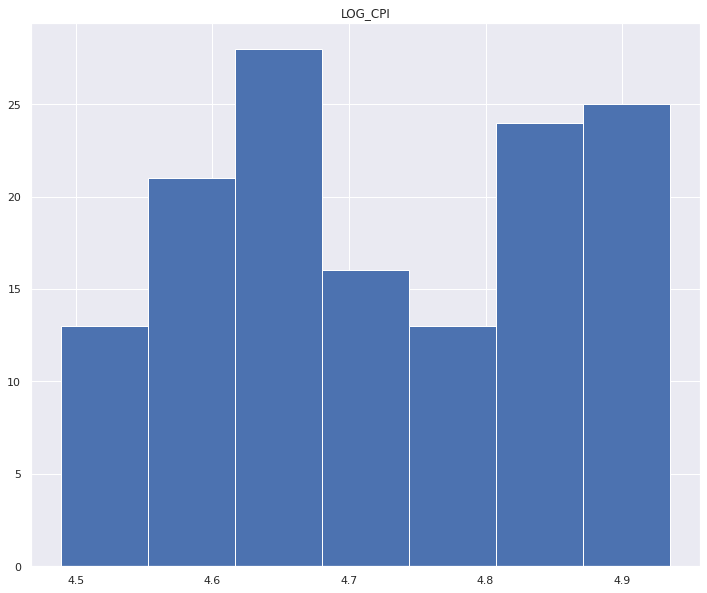

In [ ]:
plt.hist(np.log(df['CPI']),bins= 7)
plt.title('LOG_CPI')

In [ ]:
df_log = pd.DataFrame()
df_log['LOG_PR'] = np.sqrt(df['PR'])
df_log['LOG_Jkt'] = np.sqrt(df['Jkt COMP'])
df_log['LOG_Export'] = np.sqrt(df['Export'])
df_log['LOG_Com'] = np.sqrt(df['Com'])
df_log['LOG_CPI'] = np.sqrt(df['CPI'])

In [ ]:
df_log = df_log.dropna()

In [ ]:
df_log['Growth'] = np.sqrt(df['GDP G Rate'])

/usr/local/lib/python3.7/dist-packages/pandas/core/series.py:726: RuntimeWarning: invalid value encountered in sqrt
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [ ]:
df_log = df_log.dropna()
print(df_log)

      LOG_PR   LOG_Jkt  LOG_Export   LOG_Com   LOG_CPI    Growth
0   0.181818  0.000388    0.000068  0.001859  0.011228  0.000000
1   0.190476  0.000384    0.000069  0.001857  0.011196  0.000000
2   0.190476  0.000384    0.000061  0.001825  0.011211  0.000000
3   0.190476  0.000387    0.000060  0.001843  0.011194  0.000000
4   0.200000  0.000383    0.000055  0.001841  0.011162  0.064770
5   0.210526  0.000380    0.000054  0.001846  0.011055  0.062685
6   0.210526  0.000376    0.000057  0.001881  0.010884  0.060131
7   0.210526  0.000380    0.000054  0.001892  0.010801  0.059424
8   0.210526  0.000378    0.000057  0.001895  0.010754  0.061101
9   0.210526  0.000378    0.000059  0.001922  0.010748  0.062078
10  0.210526  0.000378    0.000058  0.001912  0.010684  0.059400
11  0.210526  0.000375    0.000059  0.001941  0.010586  0.058706
12  0.210526  0.000375    0.000064  0.001967  0.010493  0.055409
13  0.210526  0.000379    0.000064  0.001994  0.010480  0.055882
14  0.210526  0.000383   

In [ ]:
x_log_val = df_log.drop(['Growth'],axis=1).values
y_val = df_log['Growth'].values
print(x_log_val)
x_log_train,x_log_test,y_log_train,y_log_test = train_test_split(x_log_val,y_val,test_size = 0.3,random_state = 0)

[[1.81818182e-01 3.88287238e-04 6.84640769e-05 1.85893301e-03
  1.12283854e-02]
 [1.90476190e-01 3.83836344e-04 6.93707380e-05 1.85708953e-03
  1.11957009e-02]
 [1.90476190e-01 3.84128280e-04 6.11022852e-05 1.82523053e-03
  1.12107623e-02]
 [1.90476190e-01 3.86563815e-04 6.04076307e-05 1.84302581e-03
  1.11944476e-02]
 [2.00000000e-01 3.82501329e-04 5.46824590e-05 1.84087139e-03
  1.11619600e-02]
 [2.10526316e-01 3.79909764e-04 5.43865469e-05 1.84649019e-03
  1.10546098e-02]
 [2.10526316e-01 3.76003318e-04 5.74102248e-05 1.88132950e-03
  1.08837614e-02]
 [2.10526316e-01 3.79813375e-04 5.36256288e-05 1.89181826e-03
  1.08014690e-02]
 [2.10526316e-01 3.78045964e-04 5.70014934e-05 1.89495506e-03
  1.07538445e-02]
 [2.10526316e-01 3.77773328e-04 5.89702613e-05 1.92170955e-03
  1.07480653e-02]
 [2.10526316e-01 3.78422644e-04 5.80197847e-05 1.91218482e-03
  1.06837607e-02]
 [2.10526316e-01 3.75083784e-04 5.85558945e-05 1.94088077e-03
  1.05864916e-02]
 [2.10526316e-01 3.74915738e-04 6.422566

In [ ]:
lin_reg = linear_model.LinearRegression()
lin_reg.fit(x_log_train,y_log_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [ ]:
y_pred_log = lin_reg.predict(x_log_test)
print('R2 score',r2_score(y_log_test,y_pred_log)) 

R2 score 0.39465802074523637


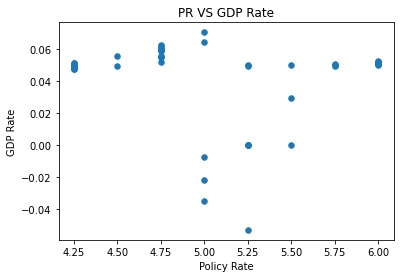

In [ ]:
scatter_plot(df['PR'],df['GDP G Rate'],'Policy Rate','GDP Rate','PR VS GDP Rate')

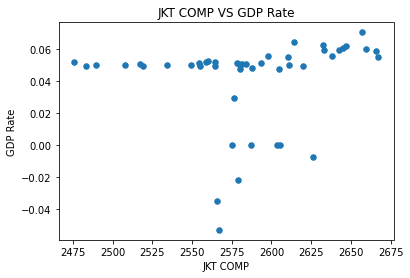

In [ ]:
scatter_plot(df['Jkt COMP'], df['GDP G Rate'],'JKT COMP','GDP Rate','JKT COMP VS GDP Rate')

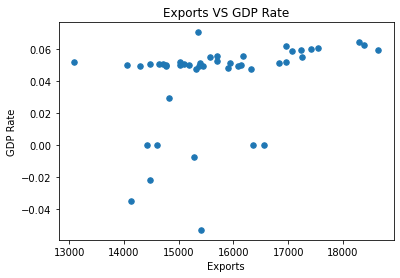

In [ ]:
scatter_plot(df['Export'],df['GDP G Rate'],'Exports','GDP Rate','Exports VS GDP Rate')

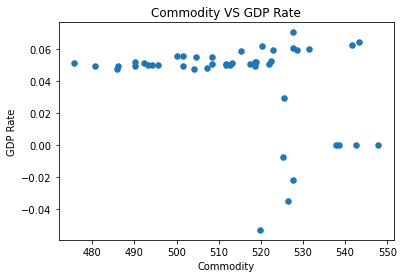

In [ ]:
scatter_plot(df['Com'],df['GDP G Rate'],'Commodity','GDP Rate','Commodity VS GDP Rate')

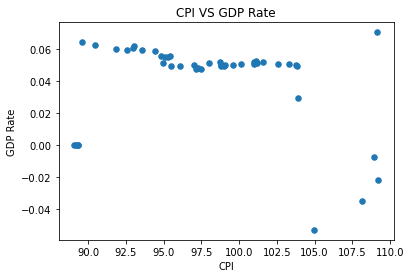

In [ ]:
scatter_plot(df['CPI'],df['GDP G Rate'],'CPI','GDP Rate','CPI VS GDP Rate')